<a href="https://colab.research.google.com/github/andreeamarialazar/proiect_chest_xray/blob/main/Copie_a_blocnotesului_chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.INTRODUCERE


Pneumonia este o infecție care inflamează unul sau ambii plămâni. Ucide mai mulți copii cu vârsta mai mică de 5 ani în fiecare an decât orice altă boală infecțioasă, cum ar fi infecția cu HIV, malaria sau tuberculoza. Diagnosticul se bazează adesea pe simptome și pe examenul fizic. Radiografia toracică ajută la confirmarea diagnosticului. Agenții patogeni bacterieni și virali sunt cele două cauze principale ale pneumoniei, dar trebuie gestionate diferit. Pneumonia bacteriană necesită trimitere urgentă pentru tratament antibiotic, în timp ce pneumonia virală este tratată cu îngrijiri de susținere. Prin urmare, diagnosticarea corectă și în timp util este imperativă. Un element cheie al diagnosticului sunt datele radiografice. Pe lângă detectarea pneumoniei dorim să realizăm distingerea pneumoniei virale și bacteriene pentru a facilita trimiterile rapide pentru copiii care au nevoie de intervenție urgentă.

# 2.STUDIU BIBLIOGRAFIC


Inteligența artificială are potențialul de a revoluționa diagnosticarea și gestionarea bolilor, prin efectuarea unei clasificări dificile pentru experții umani și prin revizuirea rapidă a unor cantități imense de imagini. În ciuda potențialului său, interpretabilitatea clinică și pregătirea fezabilă a IA rămâne o provocare. Abordarea algoritmică tradițională a analizei imaginilor pentru clasificare s-a bazat anterior pe: 
(1) segmentarea obiectelor realizate manual 
(2) identificarea fiecărui obiect segmentat folosind clasificatoare statistice sau clasificatoare de învățare automată computaționale neuronale, proiectate special pentru fiecare clasă de obiecte 
(3) clasificarea imaginii 
Crearea și rafinarea mai multor clasificatori a necesitat mulți oameni calificați și mult timp și a fost costisitoare din punct de vedere computațional 
Dezvoltarea straturilor de rețele neuronale convoluționale a permis câștiguri semnificative în capacitatea de a clasifica imagini și de a detecta obiecte dintr-o imagine. Acestea sunt mai multe straturi de procesare cărora li se aplică filtre de analiză a imaginii. Reprezentarea abstractă a imaginilor din fiecare strat este construită prin convoluția sistematică a mai multor filtre de-a lungul imaginii, producând o hartă a caracteristicilor care este utilizată ca intrare pentru următorul strat. Această arhitectură face posibilă procesarea imaginilor sub formă de pixeli ca intrare și pentru a oferi clasificarea dorită ca ieșire. Abordarea imagine-la-clasificare într-un singur clasificator înlocuiește pașii multipli ai metodelor anterioare de analiză a imaginii.

# 3.DATE UTILIZATE

Acest set de date conține 5.856 de imagini validate cu raze X toracice. Imaginile sunt împărțite într-un *set de antrenament* și un *set de testare* de pacienți independenți. Imaginile sunt etichetate ca (NORMAL/BACTERIE/VIRUS)-(ID pacient randomizat)-(numărul imaginii unui pacient). Pentru detalii despre colectarea și descrierea datelor, consultați lucrarea de mai jos.

Imaginile au fost selectate din cohorte retrospective de pacienți pediatrici cu vârsta cuprinsă între unu și cinci ani de la Centrul Medical pentru Femei și Copii din Guangzhou, Guangzhou.

Acest set de date este preluat de la https://data.mendeley.com/datasets/rscbjbr9sj/3 si l-am descarcat de pe kaggle.com.



## Importare date

In [ ]:
# importing required modules
from zipfile import ZipFile
# specifying the zip file name
file_name = "my_python_files.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')



SyntaxError: ignored

In [ ]:
## INSTALARE LIBRARIA KAGGLE
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Descarcare baza de date

In [ ]:
###fisier cu credentiale de logare catre kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"andreeamarialazar","key":"465a8cf89e1ed7195c2225d6e2b23703"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)


!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Descarcarea bazei de date

!kaggle datasets download -d tolgadincer/labeled-chest-xray-images

 99% 1.16G/1.17G [00:12<00:00, 134MB/s]
100% 1.17G/1.17G [00:12<00:00, 104MB/s]


In [ ]:
#Dezarhivare

import zipfile

path='/content/labeled-chest-xray-images.zip'
with zipfile.ZipFile(path, 'r') as zipref:
    zipref.extractall('./chestxray')

Continutul arhivelor este extras in directorul train si test, iar apoi in subdirectoarele NORMAL si PNEUMONIA.

In [ ]:
import os
#DIRECTOR TRAIN
train_path = os.path.join('/content/chestxray/chest_xray/train')
#DIRECTOR TEST
test_path = os.path.join('/content/chestxray/chest_xray/test')

# Director training horse 
train_normal_dir = os.path.join('/content/chestxray/chest_xray/train/NORMAL')

# Director training human
train_pneumonia_dir = os.path.join('/content/chestxray/chest_xray/train/PNEUMONIA')

# Director validare horse
validation_normal_dir = os.path.join('/content/chestxray/chest_xray/test/NORMAL')

# Director validare human
validation_pneumonia_dir = os.path.join('/content/chestxray/chest_xray/test/PNEUMONIA')

## Verificarea modulului in care au fost create directoarele  

In [ ]:
train_normal_chest = os.listdir(train_normal_dir)
print(train_normal_chest[:10])

train_pneumonia_chest = os.listdir(train_pneumonia_dir)
print(train_pneumonia_chest[:10])

validation_normal_chest = os.listdir(validation_normal_dir)
print(validation_normal_chest[:10])

validation_pneumonia_chest = os.listdir(validation_pneumonia_dir)
print(validation_pneumonia_chest[:10])

['NORMAL-2568157-0001.jpeg', 'NORMAL-1034239-0001.jpeg', 'NORMAL-9427315-0001.jpeg', 'NORMAL-5618998-0001.jpeg', 'NORMAL-7964343-0004.jpeg', 'NORMAL-5426353-0002.jpeg', 'NORMAL-9213108-0001.jpeg', 'NORMAL-6901859-0004.jpeg', 'NORMAL-2416577-0003.jpeg', 'NORMAL-8391295-0001.jpeg']
['BACTERIA-828649-0006.jpeg', 'BACTERIA-5334028-0002.jpeg', 'BACTERIA-3258517-0001.jpeg', 'BACTERIA-6680087-0001.jpeg', 'BACTERIA-783759-0003.jpeg', 'VIRUS-2528951-0002.jpeg', 'BACTERIA-1867881-0001.jpeg', 'BACTERIA-8705009-0005.jpeg', 'BACTERIA-6420973-0004.jpeg', 'VIRUS-9451950-0002.jpeg']
['NORMAL-3921425-0001.jpeg', 'NORMAL-9799657-0001.jpeg', 'NORMAL-8207090-0001.jpeg', 'NORMAL-2798826-0001.jpeg', 'NORMAL-3065672-0001.jpeg', 'NORMAL-284601-0001.jpeg', 'NORMAL-754920-0001.jpeg', 'NORMAL-7804528-0001.jpeg', 'NORMAL-1608079-0001.jpeg', 'NORMAL-1212407-0001.jpeg']
['BACTERIA-7346761-0001.jpeg', 'BACTERIA-840611-0001.jpeg', 'BACTERIA-5489623-0003.jpeg', 'BACTERIA-3060399-0002.jpeg', 'VIRUS-1352878-0005.jpeg', 

## Verificarea dimensiunii datelor

In [ ]:
print('total training normal xrays images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia xrays images:', len(os.listdir(train_pneumonia_dir)))
print('total validation normal xrays images:', len(os.listdir(validation_normal_dir)))
print('total validation pneumonia xrays images:', len(os.listdir(validation_pneumonia_dir)))

total training normal xrays images: 1349
total training pneumonia xrays images: 3883
total validation normal xrays images: 234
total validation pneumonia xrays images: 390


## Vizualizare imagini din directoarele create


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

#Primul pas este sa configuram modul de afisare.
#  Formatarea grafica sub forma  10 x 10 a imaginilor
nrows = 10
ncols = 10

# Index pentru iterarea imaginilor
pic_index = 0

## Afisare imagini in pachete de cate 8

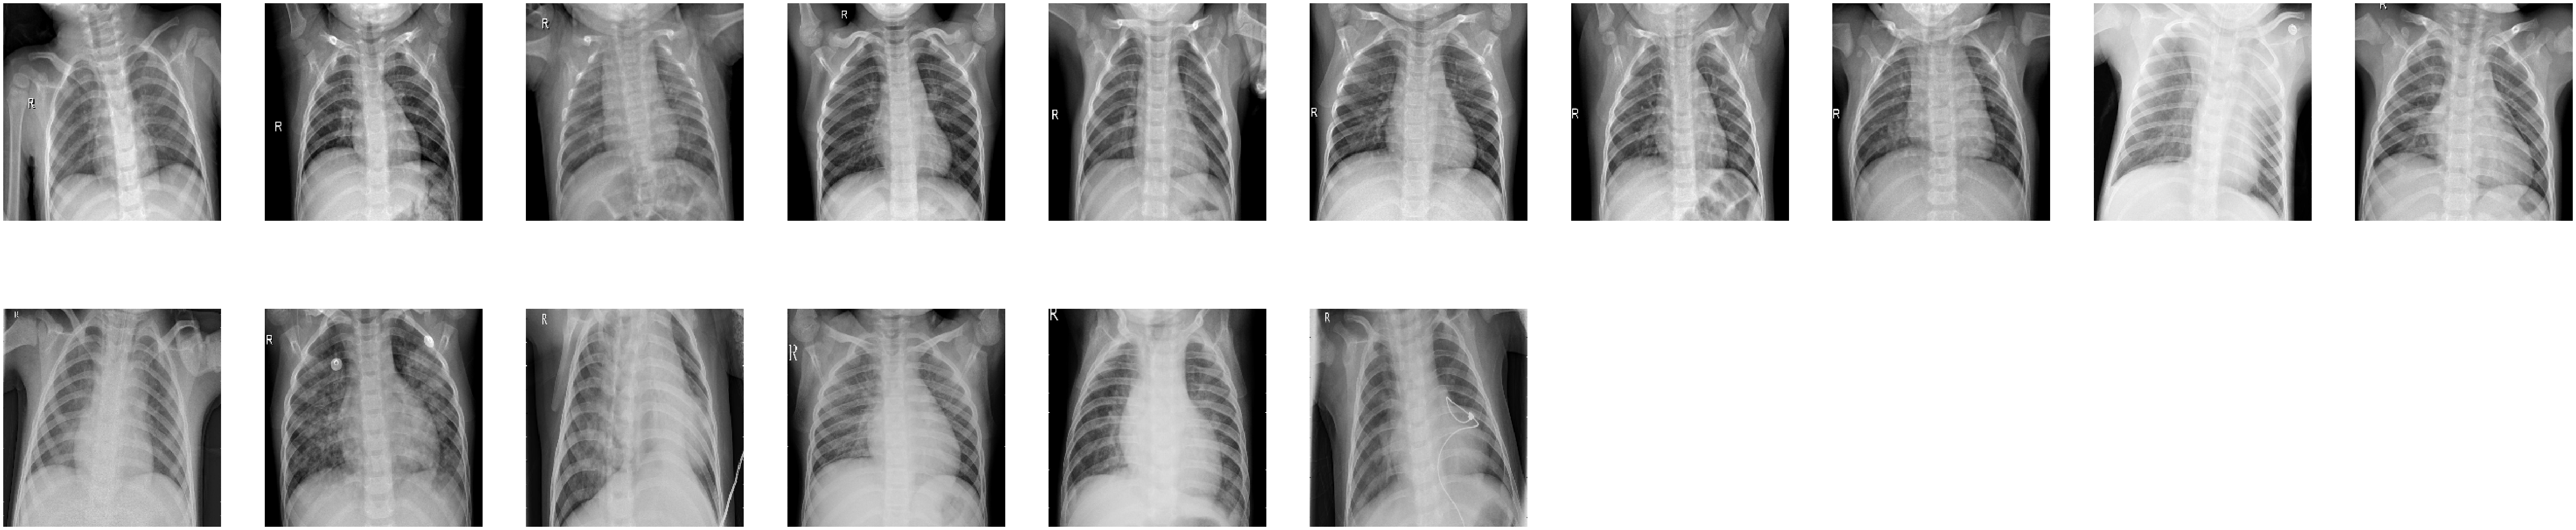

In [ ]:
# Setrarea figurii pt a se potrivii cu 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 10, nrows * 12)

pic_index += 8
next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_chest[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_chest[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):

  # generarea subgraficelor, incepand de la 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # nu afiseaza axele

  img = mpimg.imread(img_path)
  img=cv2.resize(img,(224,224))

  plt.imshow(img,
             cmap='gray', ###color map used to specify colors
             interpolation='nearest'#algorithm used to blend square colors; with 'nearest' colors will not be blended
             )

 # plt.imshow(img)

plt.show()

# 4.CONSTRUIREA MODELULUI

#   ➢ MODEL 1, cu optimizer = RMS














## Importare biblioteca tensorflow

In [ ]:
#IMPORTARE TENSORFLOW
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


Creem un model secvential folosind layere si tensor de tip 2D (matrice). Fiecare layer neuronal necesita o functie de activare care sa-i spuna ce sa faca, in cazul nostru se aplica relu care returneaza 0 daca primeste un input negativ, iar pentru o valoare pozitiva returneaza valoarea insasi. Fiind o problema de clasificare binara, vom folosi functia sigmoida. Rezultatul va fi de tipul 0 sau 1.



In [ ]:
model = tf.keras.models.Sequential([
    # Forma inputul este de 300x300 cu 3 pozitii pt culoare (RGB)
    # Convolutia 1
    #16 filtre de invatare cu matrici kernel de (3,3)
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    #MaxPooling2D ne ajuta sa identificam o radiografie indiferent de modificarile imaginii
    tf.keras.layers.MaxPooling2D(2, 2),
    # Convolutia 2
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Convolutia 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Convolutia 4
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Convolutia 5
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Apelarea Flatten pentru a se putea mapa pe straturile dense
    tf.keras.layers.Flatten(),
    # strat ascuns cu 512 neuroni
    tf.keras.layers.Dense(512, activation='relu'),
    # Stratul de output contine un singur neuron, 1 - normal, 0-pneumonia
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
##Afisam detaliile modelului
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

"Output shape" arata dimensiunea datelor in fiecare nod succesiv. Straturile convolutionale si de pooling reduc dimensiunea acestora la fiecare strat. (INFO LUATA DE LA PROFUL)

## Selectarea algoritmului de optimizare RMS 

Configuram specificatiile pentru antrenarea modelului. Functia de calcul a erorii va fi 'binary_crossentropy'. Optimizatorul folosit va fi 'RMSprop' cu un pas de 0.0003. 

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.00003),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Preprocesarea datelor

ImageGenerator citeste imaginile din directoarele sursa, le converteste in tensori si le eticheteaza apoi transmite spre reteaua neuronala. Un generator va fi folosit pentru antrenare si unul pentru validare.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Toate imaginile vor fi rescalate 
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Imaginile de training vor fi grupate in batch de  128 folosind train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/chestxray/chest_xray/train',  # directorul pentru setul de training
        target_size=(300, 300),  # Toate imaginile sunt setate la 300x300
        batch_size=128,
        # Etichetarea se face in mod binar
        class_mode='binary')

# Imaginile de validare vor fi grupate in batch de  128 folosind validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/chestxray/chest_xray/test',  # directorul pentru setul de validare
        target_size=(300, 300),  # Toate imaginile sunt setate la 300x300
        batch_size=32,
        # Etichetarea se face in mod binar
        class_mode='binary')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Antrenarea datelor

In [ ]:
###trainuirea modelului
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 114s 13s/step - loss: 0.6535 - accuracy: 0.7054 - val_loss: 0.6712 - val_accuracy: 0.6211
Epoch 2/15
8/8 [==============================] - 106s 13s/step - loss: 0.5976 - accuracy: 0.7363 - val_loss: 0.7083 - val_accuracy: 0.5977
Epoch 3/15
8/8 [==============================] - 105s 13s/step - loss: 0.5874 - accuracy: 0.7334 - val_loss: 0.6809 - val_accuracy: 0.6250
Epoch 4/15
8/8 [==============================] - 103s 13s/step - loss: 0.5745 - accuracy: 0.7393 - val_loss: 0.6845 - val_accuracy: 0.6367
Epoch 5/15
8/8 [==============================] - 106s 13s/step - loss: 0.5858 - accuracy: 0.7246 - val_loss: 0.6709 - val_accuracy: 0.6367
Epoch 6/15
8/8 [==============================] - 106s 13s/step - loss: 0.5718 - accuracy: 0.7295 - val_loss: 0.6764 - val_accuracy: 0.6328
Epoch 7/15
8/8 [==============================] - 107s 13s/step - loss: 0.5378 - accuracy: 0.7617 - val_loss: 0.6554 - val_accuracy: 0.6445
Epoch 8/15
8/8 [====

## Rularea modelului


In urma incarcarii unei imagini care ruleaza prin model putem vedea daca imaginea reprezinta o radiografie cu plaman normal sau cu penumonie. 

In [ ]:
import numpy as np
from google.colab import files
from keras import utils

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predictia imaginilor
  path = '/content/' + fn
  img = utils.load_img(path, target_size=(300, 300))

  x = utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

 
  if classes[0]>0.5:
    print(fn + " is a chest with pneumonia with a probability of: ", classes[0])
  else:
    print(fn + " is a normal chest with a probability of:", 1-classes[0])
 

Saving BACTERIA-37006-0002.jpeg to BACTERIA-37006-0002.jpeg
Saving NORMAL-191707-0001.jpeg to NORMAL-191707-0001.jpeg
1/1 [==============================] - 0s 162ms/step
BACTERIA-37006-0002.jpeg is a chest with pneumonia with a probability of:  [1.]
1/1 [==============================] - 0s 40ms/step
NORMAL-191707-0001.jpeg is a chest with pneumonia with a probability of:  [1.]


## ⁃ REZULTATE

In [ ]:
score = model.evaluate(validation_generator, steps = (len(validation_normal_dir)+len(validation_pneumonia_dir))/32, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.6092836856842041
Val accuracy: 0.6458333134651184


      Acuracy si loss pentru valorile de test

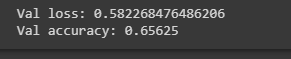

In [ ]:
score = model.evaluate(train_generator, steps = (len(train_normal_dir)+len(train_pneumonia_dir))/32, verbose = 0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.5172109603881836
Train accuracy: 0.7005208134651184


      Accuracy si loss pentru valorile de training
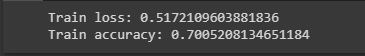

# ➢ MODEL 2, cu optimizer = Adam

## Preluare date

In [ ]:
import glob
import pandas as pd   
import numpy as np
main_path = "../content/chestxray/chest_xray"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]
df_train.head()

,class,image
0,Normal,../content/chestxray/chest_xray/train/NORMAL/N...
1,Normal,../content/chestxray/chest_xray/train/NORMAL/N...
2,Normal,../content/chestxray/chest_xray/train/NORMAL/N...
3,Normal,../content/chestxray/chest_xray/train/NORMAL/N...
4,Normal,../content/chestxray/chest_xray/train/NORMAL/N...


In [ ]:
df_test.head()

,class,image
0,Normal,../content/chestxray/chest_xray/test/NORMAL/NO...
1,Normal,../content/chestxray/chest_xray/test/NORMAL/NO...
2,Normal,../content/chestxray/chest_xray/test/NORMAL/NO...
3,Normal,../content/chestxray/chest_xray/test/NORMAL/NO...
4,Normal,../content/chestxray/chest_xray/test/NORMAL/NO...


In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(
    df_train, test_size = 0.20, random_state = SEED, 
    stratify = df_train['class'])

In [ ]:
train_df

,class,image
3566,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
2866,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
2681,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
1199,Normal,../content/chestxray/chest_xray/train/NORMAL/N...
4619,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
...,...,...
3476,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
678,Normal,../content/chestxray/chest_xray/train/NORMAL/N...
1560,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
2769,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...


In [ ]:
val_df

,class,image
2945,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
4878,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
3177,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
972,Normal,../content/chestxray/chest_xray/train/NORMAL/N...
3059,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
...,...,...
253,Normal,../content/chestxray/chest_xray/train/NORMAL/N...
4315,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...
687,Normal,../content/chestxray/chest_xray/train/NORMAL/N...
3417,Pneumonia,../content/chestxray/chest_xray/train/PNEUMONI...


Incarcam imaginile. Incepem prin definirea generatoarelor de date. Cu Keras ImageDataGenerator, redimensionam valorile pixelilor. Definim doua generatoare diferite. Val_datagen este folosit pentru a redimensiona pur și simplu seturile de validare și testare. Aplicam acei generatori pe fiecare set de date folosind metoda flow_from_dataframe. In afara de transformarile definite in fiecare generator, imaginile sunt redimensionate si in functie de target_size.



In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)
IMG_SIZE=224
BATCH=32
SEED=42

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


BACTERIA-5967874-0002.jpeg
/content/chestxray/chest_xray/train/PNEUMONIA/BACTERIA-5967874-0002.jpeg
(1010, 1588, 3)


## Custom CNN

In [ ]:
#Setare callbakcs
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

## Creare model

In [ ]:
def get_model():

    IMG_SIZE=224
    
    #Input shape = [width, height, color channels]
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Block One
    x = tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    # Block Two
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    
    # Block Three
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    #Final Layer (Output)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [ ]:
import keras

keras.backend.clear_session()

## Selectarea algoritmului de optimizare Adam

In [ ]:
model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

In [ ]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_3 (Batc  (None, 222, 222, 16)     64        
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 111, 111, 16)      0   

In [ ]:
BATCH=32
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
130/130 [==============================] - 263s 2s/step - loss: 0.5421 - binary_accuracy: 0.7589 - val_loss: 0.7889 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 2/50
130/130 [==============================] - 263s 2s/step - loss: 0.3441 - binary_accuracy: 0.8437 - val_loss: 1.3622 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 3/50
131/130 [==============================] - ETA: 0s - loss: 0.2839 - binary_accuracy: 0.8817
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 257s 2s/step - loss: 0.2839 - binary_accuracy: 0.8817 - val_loss: 1.5959 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 4/50
130/130 [==============================] - 259s 2s/step - loss: 0.2470 - binary_accuracy: 0.8970 - val_loss: 1.1244 - val_binary_accuracy: 0.7421 - lr: 6.0000e-06
Epoch 5/50
130/130 [==============================] - 260s 2s/step - loss: 0.2238 - binary_accuracy: 0.9070 - val_loss: 0.5239 - val_bi

In [ ]:
import numpy as np
from google.colab import files
from keras import utils

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predictia imaginilor
  path = '/content/' + fn
  img = utils.load_img(path, target_size=(224, 224))

  x = utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

 
  if classes[0]>0.5:
    print(fn + " is a chest with pneumonia with a probability of: ", classes[0])
  else:
    print(fn + " is a normal chest with a probability of:", 1-classes[0])
 

Saving BACTERIA-37006-0002.jpeg to BACTERIA-37006-0002.jpeg
Saving NORMAL-191707-0001.jpeg to NORMAL-191707-0001.jpeg
1/1 [==============================] - 0s 46ms/step
BACTERIA-37006-0002.jpeg is a chest with pneumonia with a probability of:  [1.]
1/1 [==============================] - 0s 31ms/step
NORMAL-191707-0001.jpeg is a normal chest with a probability of: [1.]


    Verificare #1 model

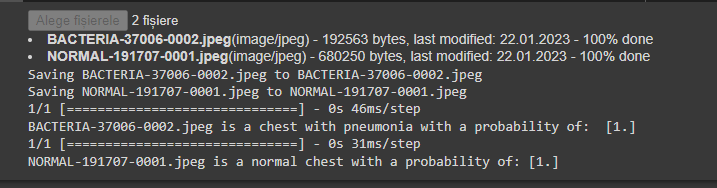

    Verificare #2 model

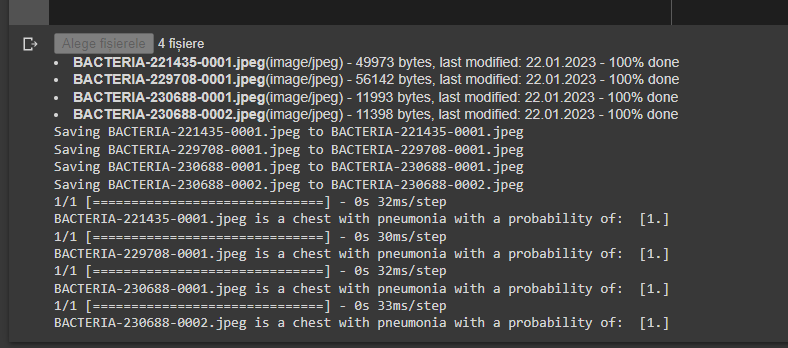

      Verificare #3 model

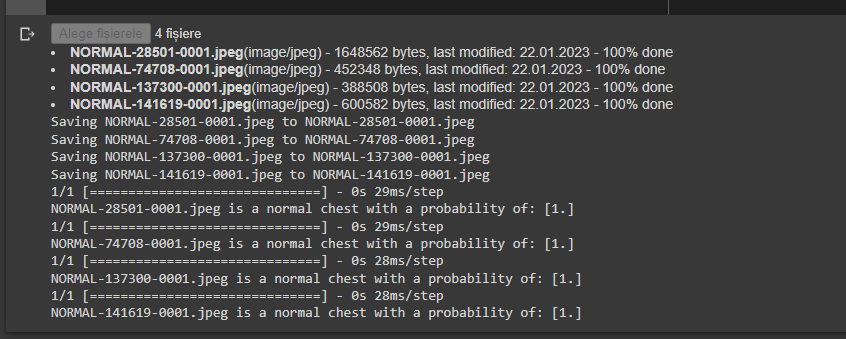

## ⁃ REZULTATE

In [ ]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.13750235736370087
Val accuracy: 0.9503343105316162


    Rezultate pentru acuratete si loss pentru datele de training

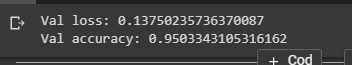

In [ ]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: ignored

    Rezultat pentru acuratete si loss pe datele de test

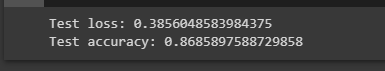

Performanta retelei este de aprox 93% acuratete pentru setul de training si 95% pentru setul de test.

# 5.CONCLUZII

Folosind Tensorflow, am adaptat o arhitectură pe setul de date ChestXray. 
In cadrul experimentelor noastre am creat 2 modele. In primul model s-a obtinut o acuratete de aproximativ de 76% pe datele de trainig si 60% pe detele de test. Din cauza faptului ca avem un caz de overfitting pe primul model am incercat sa reconstruim modelul. In cadrul celui de al doilea model am obtinut o acuratete de 93% pe datele de training si aproximativ 95% pe datele de test.
In cadrul celui de al doilea model s-au folosit starturi convolutionale, avand ca si functie activatoare pe "sigmoid" sau "relu" pentru a putea recunoaste clasele. Ulterior s-au folosit pool-uri pentru a putea recunoaste imaginile indiferent de modificarile acestora. In final, s-a obtinut o retea cu un singur neuron care a fost antrenata folosind Adam Optimezer cu o rata de invatare de 0.0003 si defasurandu-se pe 50 de epoci.


# 6.BIBLIOGRAFIE
https://www.geeksforgeeks.org/working-zip-files-python/

https://www.mygreatlearning.com/blog/relu-activation-function/

https://machinelearningmastery.com 

https://indiantechwarrior.com/how-to-work-with-cnn-max-pooling-layers-in-tensorflow/

https://iq.opengenus.org/conv2d-in-tf/
https://www.databricks.com/glossary/convolutional-layer


https://towardsdatascience.com/creating-deeper-bottleneck-resnet-from-scratch-using-tensorflow-93e11ff7eb02